<a href="https://colab.research.google.com/github/rafahenriozelame/rafahenriozelame/blob/main/C%C3%B3pia_de_Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
# Tenta detectar o separador automaticamente
df_correg = pd.read_csv("TJPR_tbl_correg.csv", sep=None, engine='python')

# Verifica colunas disponíveis
print("🔎 Colunas disponíveis:")
print(df_correg.columns.tolist())

# Exibe as 5 primeiras linhas
print("\n📄 Primeiras linhas:")
print(df_correg.head())

# Tipos de dados
print("\n📊 Tipos de dados:")
print(df_correg.dtypes)

# Quantidade de nulos por coluna
print("\n🚫 Nulos por coluna:")
print(df_correg.isnull().sum())

# Total de linhas
print(f"\n📏 Total de linhas: {len(df_correg)}")


🔎 Colunas disponíveis:
['\ufeffTribunal', 'Codigo orgao', 'Municipio', 'UF', 'Nome orgao', 'Grau', 'CP_May_2024', 'CP_May_2025', '%CP', 'Sus_May_2024', 'Sus_May_2025', '%Sus', 'CN_12_meses', 'Tbaix_12_meses', 'Desp_12_meses', 'DecInc_12_meses', 'SentCM_12_meses', 'SentSM_12_meses', 'ProcSM100_May_2025', 'Conc100_May_2025', 'TPSent_12_meses', 'TPCPL_May_2025', 'TC_May_2025', 'IAD_12_meses']

📄 Primeiras linhas:
  ﻿Tribunal  Codigo orgao Municipio  UF  \
0      TJPR         27035  CURITIBA  PR   
1      TJPR         45172  CURITIBA  PR   
2      TJPR         84961  CURITIBA  PR   
3      TJPR         79503  CURITIBA  PR   
4      TJPR         27025  CURITIBA  PR   

                                          Nome orgao Grau  CP_May_2024  \
0  GABINETE DO JUIZ SUBSTITUTO EM 2º GRAU RAUL VA...   G2        2.000   
1                               TURMA RECURSAL ÚNICA   TR        1.906   
2     GABINETE DO DESEMBARGADOR JOSÉ MARCOS DE MOURA   G2       68.000   
3                          TURM

In [ ]:
import re

def converter_idade_para_meses(valor):
    if pd.isnull(valor):
        return np.nan
    match = re.match(r"(?:(\d+)\s*anos?)?\s*(?:e\s*)?(?:(\d+)\s*meses?)?", str(valor))
    if match:
        anos = int(match.group(1)) if match.group(1) else 0
        meses = int(match.group(2)) if match.group(2) else 0
        return anos * 12 + meses
    return np.nan


In [ ]:
df_correg["tpcpl"] = df_correg["TPCPL_May_2025"].apply(converter_idade_para_meses)

# Verificar estatísticas
print(df_correg["tpcpl"].describe())

# Exibir valores únicos convertidos
print("\n🔢 Valores únicos (convertidos):")
print(sorted(df_correg["tpcpl"].dropna().unique()))


count    893.000000
mean      25.202688
std       27.406758
min        0.000000
25%       10.000000
50%       20.000000
75%       30.000000
max      203.000000
Name: tpcpl, dtype: float64

🔢 Valores únicos (convertidos):
[np.float64(0.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(8.0), np.float64(9.0), np.float64(10.0), np.float64(11.0), np.float64(12.0), np.float64(14.0), np.float64(15.0), np.float64(16.0), np.float64(17.0), np.float64(18.0), np.float64(19.0), np.float64(20.0), np.float64(21.0), np.float64(22.0), np.float64(23.0), np.float64(24.0), np.float64(26.0), np.float64(27.0), np.float64(28.0), np.float64(29.0), np.float64(30.0), np.float64(31.0), np.float64(32.0), np.float64(33.0), np.float64(34.0), np.float64(35.0), np.float64(36.0), np.float64(38.0), np.float64(39.0), np.float64(40.0), np.float64(41.0), np.float64(42.0), np.float64(43.0), np.float64(45.0), np.float64(46.0), np.float64(47.0), np.float64(48

In [ ]:
df_tpcpl = df_correg.groupby("Municipio", as_index=False)["tpcpl"].mean()
print("🔎 Municípios únicos no df_tpcpl:", len(df_tpcpl))
df_tpcpl.head()


🔎 Municípios únicos no df_tpcpl: 163


,Municipio,tpcpl
0,ALMIRANTE TAMANDARÉ,24.857143
1,ALTO PARANA,24.000000
2,ALTO PIQUIRI,21.000000
3,ALTONIA,33.000000
4,AMPERE,26.000000


In [ ]:
import pandas as pd

# Leitura inicial do CSV
df_servidores = pd.read_csv("servidorestjpr.csv", sep=None, engine="python")

# Visualização geral
print("📏 Total de linhas e colunas:", df_servidores.shape)
print("\n📋 Colunas disponíveis:")
print(df_servidores.columns.tolist())

print("\n🔍 Primeiras linhas:")
display(df_servidores.head())

print("\n🧼 Nulos por coluna:")
print(df_servidores.isnull().sum())

print("\n🔢 Tipos de dados:")
print(df_servidores.dtypes)


📏 Total de linhas e colunas: (760, 26)

📋 Colunas disponíveis:
['\ufeffGrau', 'UF', 'Comarca', 'Unidade Judicial', 'Grupo', 'Gabinete - Efetivos', 'Gabinete - Sem Vínculo', 'Lotação Real - Efetivos', 'Lotação Real - Sem Vínculo', 'Lotação Real - Cessão ou Requisição', 'Total de Pessoas Lotadas (Efetivo + SV + I)', 'Lotação Real - Outros', 'Servidores Afastados', 'Índice de Produtividade Secretaria', '3º Quadrimestre - IPS Sec GC', '3º Quadrimestre - IPS Sec SC', 'Lotação Paradigma - Secretaria', 'Lotação Paradigma - Unidade Judicial', 'Cargo em Comissão - C1', 'Cargo em Comissão - C2', 'Cargo em Comissão - C3', 'Cargo em Comissão - C4', 'Cargo em Comissão - C5', 'Cargo em Comissão - D1', 'Cargo em Comissão - C6', 'Cargo em Comissão - D2']

🔍 Primeiras linhas:


,﻿Grau,UF,Comarca,Unidade Judicial,Grupo,Gabinete - Efetivos,Gabinete - Sem Vínculo,Lotação Real - Efetivos,Lotação Real - Sem Vínculo,Lotação Real - Cessão ou Requisição,...,Lotação Paradigma - Secretaria,Lotação Paradigma - Unidade Judicial,Cargo em Comissão - C1,Cargo em Comissão - C2,Cargo em Comissão - C3,Cargo em Comissão - C4,Cargo em Comissão - C5,Cargo em Comissão - D1,Cargo em Comissão - C6,Cargo em Comissão - D2
0,1º Grau,PR,ALMIRANTE TAMANDARÉ,SECRETARIA ESPECIALIZADA DE MOVIMENTAÇÃO PROCE...,CÍVEL E FAZENDA,1,6,1,0,6,...,54,6 6,00,9,17,NaN,4,0,3,2
1,1º Grau,PR,ALMIRANTE TAMANDARÉ,1ª Vara Criminal,CRIME,0,3,5,3,0,...,4 4,8,2,0,1,1,0,1,0,0
2,1º Grau,PR,ALMIRANTE TAMANDARÉ,2ª Vara Criminal,CRIME,0,3,5,3,0,...,4 4,8,2,0,1,1,0,1,0,0
3,1º Grau,PR,ALMIRANTE TAMANDARÉ,Vara de Família e Sucessões,FAMÍLIA,0,3,5,NaN,3,...,412,39,1,4,8,2,0,1,NaN,1
4,1º Grau,PR,ALMIRANTE TAMANDARÉ,Infância e Juventude,FAMÍLIA,0,3,5,NaN,3,...,412,39,1,4,8,2,0,1,NaN,1



🧼 Nulos por coluna:
﻿Grau                                           58
UF                                               7
Comarca                                          9
Unidade Judicial                                 0
Grupo                                            3
Gabinete - Efetivos                             28
Gabinete - Sem Vínculo                          13
Lotação Real - Efetivos                         31
Lotação Real - Sem Vínculo                     559
Lotação Real - Cessão ou Requisição             49
Total de Pessoas Lotadas (Efetivo + SV + I)     49
Lotação Real - Outros                           50
Servidores Afastados                            60
Índice de Produtividade Secretaria              58
3º Quadrimestre - IPS Sec GC                    58
3º Quadrimestre - IPS Sec SC                    58
Lotação Paradigma - Secretaria                  58
Lotação Paradigma - Unidade Judicial            58
Cargo em Comissão - C1                          59
Cargo em C

In [ ]:
# Selecionar apenas as colunas desejadas
df_lotacao_resumido = df_servidores[[
    "Comarca",
    "Gabinete - Efetivos",
    "Gabinete - Sem Vínculo",
    "Lotação Real - Efetivos",
    "Lotação Real - Sem Vínculo"
]].copy()

# Exibir para verificação
import ace_tools as tools; tools.display_dataframe_to_user(name="Lotação Resumida por Comarca", dataframe=df_lotacao_resumido)


ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
# Selecionar apenas as colunas desejadas
df_lotacao_resumido = df_servidores[[
    "Comarca",
    "Gabinete - Efetivos",
    "Gabinete - Sem Vínculo",
    "Lotação Real - Efetivos",
    "Lotação Real - Sem Vínculo"
]].copy()

# Visualizar as 10 primeiras linhas para conferência
df_lotacao_resumido.head(10)


,Comarca,Gabinete - Efetivos,Gabinete - Sem Vínculo,Lotação Real - Efetivos,Lotação Real - Sem Vínculo
0,ALMIRANTE TAMANDARÉ,1,6,1,0
1,ALMIRANTE TAMANDARÉ,0,3,5,3
2,ALMIRANTE TAMANDARÉ,0,3,5,3
3,ALMIRANTE TAMANDARÉ,0,3,5,NaN
4,ALMIRANTE TAMANDARÉ,0,3,5,NaN
5,ALMIRANTE TAMANDARÉ,0,3,5,NaN
6,ALMIRANTE TAMANDARÉ,0,0,5,NaN
7,ALMIRANTE TAMANDARÉ,0,0,5,NaN
8,ALTO PARANÁ,0,3,3,NaN
9,ALTO PIQUIRI,0,3,4,NaN


In [ ]:
df_lotacao_resumido.to_csv("lotacao_resumida.csv", index=False)


In [ ]:
# Converter as colunas para numérico, tratando possíveis erros
for col in [
    "Gabinete - Efetivos",
    "Gabinete - Sem Vínculo",
    "Lotação Real - Efetivos",
    "Lotação Real - Sem Vínculo"
]:
    df_lotacao_resumido[col] = pd.to_numeric(df_lotacao_resumido[col], errors="coerce")

# Agrupar por Comarca e somar
df_lotacao_total = df_lotacao_resumido.groupby("Comarca", as_index=False).sum()

# Visualizar resultado
df_lotacao_total.head(10)


,Comarca,Gabinete - Efetivos,Gabinete - Sem Vínculo,Lotação Real - Efetivos,Lotação Real - Sem Vínculo
0,-,0.0,0.0,0.0,0.0
1,0,0.0,26.0,2.0,0.0
2,1,527.0,14.0,6.0,0.0
3,2,0.0,0.0,4.0,0.0
4,3,0.0,0.0,3.0,0.0
5,ALMIRANTE TAMANDARÉ,1.0,21.0,36.0,6.0
6,ALTO PARANÁ,0.0,3.0,3.0,0.0
7,ALTO PIQUIRI,0.0,3.0,4.0,0.0
8,ALTÔNIA,1.0,3.0,4.0,0.0
9,AMPÉRE,0.0,3.0,6.0,4.0


In [ ]:
import re

# Função para converter "14 anos e 5 meses" → 14.42
def converte_tempo(texto):
    if pd.isna(texto):
        return None
    match = re.match(r"(\d+)\s+anos?(?:\s+e\s+(\d+)\s+meses?)?", texto)
    if match:
        anos = int(match.group(1))
        meses = int(match.group(2)) if match.group(2) else 0
        return round(anos + meses / 12, 2)
    return None

# Aplicar a conversão
df_tbl_correg["tpcpl"] = df_tbl_correg["TPCPL_May_2025"].apply(converte_tempo)


NameError: name 'df_tbl_correg' is not defined

In [ ]:
# Ver quais DataFrames estão disponíveis
for var in dir():
    if "df" in var:
        print(var)


df_correg
df_lotacao_resumido
df_lotacao_total
df_servidores
df_tpcpl


In [ ]:
df_correg.info()
df_correg.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ﻿Tribunal           1027 non-null   object 
 1   Codigo orgao        1027 non-null   int64  
 2   Municipio           1027 non-null   object 
 3   UF                  1027 non-null   object 
 4   Nome orgao          1027 non-null   object 
 5   Grau                1027 non-null   object 
 6   CP_May_2024         1027 non-null   float64
 7   CP_May_2025         1027 non-null   float64
 8   %CP                 914 non-null    object 
 9   Sus_May_2024        1027 non-null   float64
 10  Sus_May_2025        1027 non-null   float64
 11  %Sus                813 non-null    object 
 12  CN_12_meses         1027 non-null   float64
 13  Tbaix_12_meses      1027 non-null   float64
 14  Desp_12_meses       1027 non-null   float64
 15  DecInc_12_meses     1027 non-null   float64
 16  SentCM

,0
﻿Tribunal,0
Codigo orgao,0
Municipio,0
UF,0
Nome orgao,0
Grau,0
CP_May_2024,0
CP_May_2025,0
%CP,113
Sus_May_2024,0


In [ ]:
# Verificar os valores únicos na coluna 'Grau'
df_correg["Grau"].unique()


array(['G2', 'TR', 'G1', 'G1, JE', 'JE'], dtype=object)

In [ ]:
# Filtrar apenas as linhas do 1º grau de jurisdição
df_correg_1grau = df_correg[df_correg["Grau"].isin(["G1", "G1, JE", "JE"])].copy()

# Verificar resultado
print(f"Número de linhas após filtro do 1º grau: {df_correg_1grau.shape[0]}")


Número de linhas após filtro do 1º grau: 730


In [ ]:
# Agrupar por Município, tirando a média do tpcpl
df_tpcpl_municipio = df_correg_1grau.groupby("Municipio", as_index=False)["tpcpl"].mean()

# Verificar
print(f"Total de municípios únicos: {df_tpcpl_municipio.shape[0]}")
df_tpcpl_municipio.head()


Total de municípios únicos: 163


,Municipio,tpcpl
0,ALMIRANTE TAMANDARÉ,24.857143
1,ALTO PARANA,24.000000
2,ALTO PIQUIRI,21.000000
3,ALTONIA,33.000000
4,AMPERE,26.000000


In [ ]:
# Verificar colunas disponíveis em cada DataFrame
print("Colunas em df_lotacao_total:")
print(df_lotacao_total.columns.tolist())

print("\nColunas em df_tpcpl_municipio:")
print(df_tpcpl_municipio.columns.tolist())

# Verificar os nomes únicos de comarcas e municípios
print("\nComarcas únicas em df_lotacao_total:")
print(sorted(df_lotacao_total['Comarca'].dropna().unique()))

print("\nMunicípios únicos em df_tpcpl_municipio:")
print(sorted(df_tpcpl_municipio['Municipio'].dropna().unique()))

# Identificar nomes que existem em um DataFrame e não no outro
comarcas = set(df_lotacao_total['Comarca'].dropna().str.strip().str.upper())
municipios = set(df_tpcpl_municipio['Municipio'].dropna().str.strip().str.upper())

nao_casaram = comarcas - municipios

print(f"\nTotal de comarcas que não casam com municípios: {len(nao_casaram)}")
print("Exemplos de comarcas que não casaram:")
print(sorted(list(nao_casaram))[:20])  # mostra os 20 primeiros


Colunas em df_lotacao_total:
['Comarca', 'Gabinete - Efetivos', 'Gabinete - Sem Vínculo', 'Lotação Real - Efetivos', 'Lotação Real - Sem Vínculo']

Colunas em df_tpcpl_municipio:
['Municipio', 'tpcpl']

Comarcas únicas em df_lotacao_total:
['-', '0', '1', '2', '3', 'ALMIRANTE TAMANDARÉ', 'ALTO PARANÁ', 'ALTO PIQUIRI', 'ALTÔNIA', 'AMPÉRE', 'ANDIRÁ', 'ANTONINA', 'APUCARANA', 'ARAPONGAS', 'ARAPOTI', 'ARAUCÁRIA', 'ASSAÍ', 'ASSIS CHATEAUBRIAND', 'ASTORGA', 'BANDEIRANTES', 'BARBOSA FERRAZ', 'BARRACÃO', 'BELA VISTA DO PARAÍSO', 'BOCAIÚVA DO SUL', 'CAMBARÁ', 'CAMBÉ', 'CAMPINA DA LAGOA', 'CAMPINA GRANDE DO SUL', 'CAMPO LARGO', 'CAMPO MOURÃO', 'CANTAGALO', 'CAPANEMA', 'CAPITÃO LEÔNIDAS\nMARQUES', 'CARLÓPOLIS', 'CASCAVEL', 'CASTRO', 'CATANDUVAS', 'CENTENÁRIO DO SUL', 'CERRO AZUL', 'CHOPINZINHO', 'CIANORTE', 'CIDADE GAÚCHA', 'CLEVELÂNDIA', 'COLOMBO', 'COLORADO', 'CONGONHINHAS', 'CORBÉLIA', 'CORNÉLIO PROCÓPIO', 'CORONEL VIVIDA', 'CRUZEIRO DO OESTE', 'CURITIBA', 'CURIÚVA', 'Cartório', 'Comarca', 'CÂ

In [ ]:
!pip install unidecode


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 5.3 MB/s eta 0:00:00


In [ ]:
import unidecode

# Função de normalização
def normaliza(texto):
    if pd.isnull(texto):
        return ''
    return unidecode.unidecode(str(texto).strip().replace('\n', ' ')).upper()

# Aplicar aos dois DataFrames
df_lotacao_total["Comarca_Normalizada"] = df_lotacao_total["Comarca"].apply(normaliza)
df_tpcpl_municipio["Municipio_Normalizado"] = df_tpcpl_municipio["Municipio"].apply(normaliza)


In [ ]:
comarcas_norm = set(df_lotacao_total["Comarca_Normalizada"].unique())
municipios_norm = set(df_tpcpl_municipio["Municipio_Normalizado"].unique())

nao_casaram_apos_norm = comarcas_norm - municipios_norm

print(f"❗ Após normalização, continuam sem casar: {len(nao_casaram_apos_norm)}")
print("🔍 Exemplos:")
print(sorted(list(nao_casaram_apos_norm))[:20])


❗ Após normalização, continuam sem casar: 12
🔍 Exemplos:
['-', '0', '1', '2', '3', 'CARTORIO', 'COMARCA', 'DPAOU)TA', 'LR_EFE', 'PAUTA', 'RECUR', 'TOTAL DE SERVI']


In [ ]:
# Filtrar apenas comarcas válidas
comarcas_validas = df_tpcpl_municipio["Municipio_Normalizado"].unique()
df_lotacao_validado = df_lotacao_total[df_lotacao_total["Comarca_Normalizada"].isin(comarcas_validas)].copy()


In [ ]:
# Merge pelo nome normalizado
df_merged = pd.merge(
    df_lotacao_validado,
    df_tpcpl_municipio,
    left_on="Comarca_Normalizada",
    right_on="Municipio_Normalizado",
    how="left"
)


In [ ]:
# Salvar como CSV no ambiente do Colab
df_merged.to_csv("banco_final_tpcpl.csv", index=False)

# Download direto no navegador (Colab)
from google.colab import files
files.download("banco_final_tpcpl.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Salvar como arquivo Excel
df_merged.to_excel("banco_final_tpcpl.xlsx", index=False)

# Fazer o download do arquivo
from google.colab import files
files.download("banco_final_tpcpl.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
import pandas as pd

# 1. Carregar a base
df = pd.read_csv("/content/banco_final_tpcpl.csv")

In [ ]:
# Ver todas as colunas reais do Excel carregado
print("Colunas disponíveis:", df.columns.tolist())


Colunas disponíveis: ['Comarca', 'Gabinete - Efetivos', 'Gabinete - Sem Vínculo', 'Lotação Real - Efetivos', 'Lotação Real - Sem Vínculo', 'Comarca_Normalizada', 'Municipio', 'tpcpl', 'Municipio_Normalizado']


In [ ]:
!pip install graphviz
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


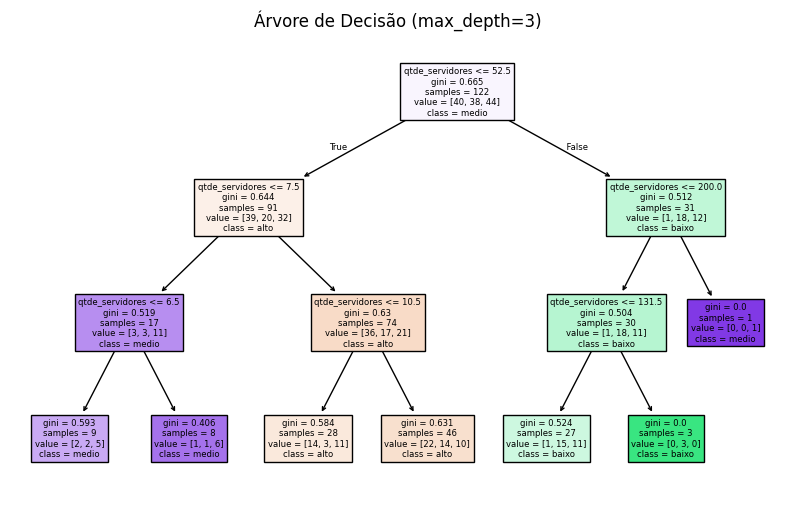

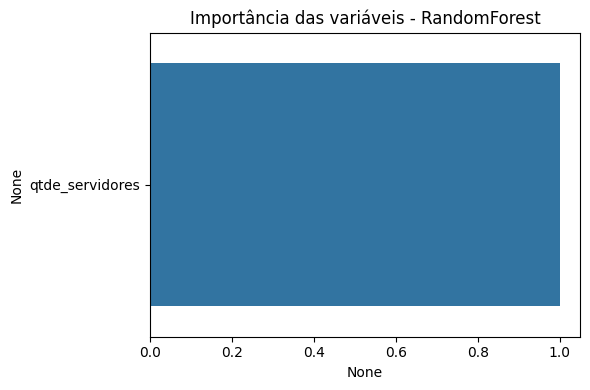

              precision    recall  f1-score   support

        alto       0.59      0.67      0.62        15
       baixo       0.70      0.41      0.52        17
       medio       0.43      0.67      0.52         9

    accuracy                           0.56        41
   macro avg       0.57      0.58      0.56        41
weighted avg       0.60      0.56      0.56        41



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar o banco final
df = pd.read_excel("/content/banco_final_tpcpl.xlsx")

# 2. Criar variável total de servidores
df["qtde_servidores"] = (
    pd.to_numeric(df["Gabinete - Efetivos"], errors="coerce").fillna(0) +
    pd.to_numeric(df["Gabinete - Sem Vínculo"], errors="coerce").fillna(0) +
    pd.to_numeric(df["Lotação Real - Efetivos"], errors="coerce").fillna(0) +
    pd.to_numeric(df["Lotação Real - Sem Vínculo"], errors="coerce").fillna(0)
)

# 3. Remover linhas com dados ausentes nas variáveis de interesse
df_modelo = df.dropna(subset=["tpcpl", "qtde_servidores"])

# 4. Criar a variável categórica com tercis (baixo, médio, alto)
df_modelo["tpcpl_cat"] = pd.qcut(df_modelo["tpcpl"], q=3, labels=["baixo", "medio", "alto"])

# 5. Variáveis independentes (você pode adicionar mais)
X = df_modelo[["qtde_servidores"]]
y = df_modelo["tpcpl_cat"]

# 6. Dividir em treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# -------------------------------
# 🌲 DECISION TREE CLASSIFIER
# -------------------------------
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

plt.figure(figsize=(10, 6))
plot_tree(dt_model, feature_names=X.columns, class_names=dt_model.classes_, filled=True)
plt.title("Árvore de Decisão (max_depth=3)")
plt.savefig("/content/arvore_decisao.png", dpi=300)
plt.show()

# -------------------------------
# 🌳 RANDOM FOREST CLASSIFIER
# -------------------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Importância das variáveis
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=importances.index)
plt.title("Importância das variáveis - RandomForest")
plt.tight_layout()
plt.savefig("/content/importancia_randomforest.png", dpi=300)
plt.show()

# -------------------------------
# 📄 Avaliação
# -------------------------------
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))


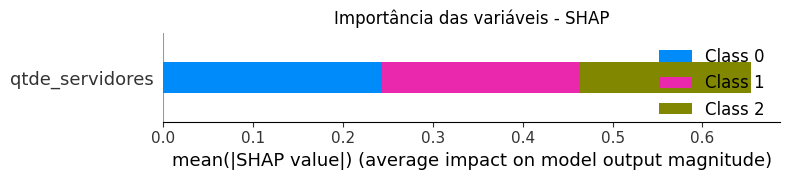

IndexError: index 1 is out of bounds for axis 1 with size 1

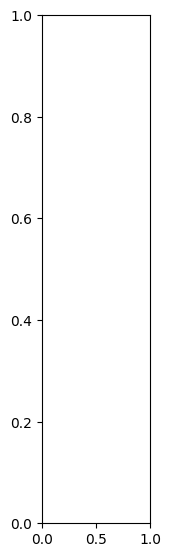

In [ ]:
!pip install shap

import shap

# Ajustar modelo com todas as variáveis explicativas
X = df_modelo[["qtde_servidores"]]  # ou inclua mais: ["qtde_servidores", "produtividade", "idhm_2010"]
y = df_modelo["tpcpl_cat"]

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Calcular os valores SHAP
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X)

# Visualizar gráfico de importância SHAP
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.title("Importância das variáveis - SHAP")
plt.tight_layout()
plt.savefig("/content/shap_importancia.png", dpi=300)
plt.show()

# Gráfico de dispersão SHAP (individual)
shap.summary_plot(shap_values, X, show=False)
plt.savefig("/content/shap_dispersao.png", dpi=300)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import shap

# Carregar os dados
df = pd.read_excel("/content/banco_final_tpcpl.xlsx")

# Filtrar apenas as colunas necessárias
df_modelo = df[["Comarca", "qtde_servidores", "tpcpl"]].dropna()

# Criar variável categórica de target
df_modelo["tpcpl_cat"] = pd.qcut(df_modelo["tpcpl"], q=3, labels=["baixo", "medio", "alto"])

# Separar X e y
X_raw = df_modelo[["Comarca", "qtde_servidores"]]
y = df_modelo["tpcpl_cat"]

# One-hot encoding para Comarca
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X_raw[["Comarca"]])
encoded_cols = encoder.get_feature_names_out(["Comarca"])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_cols)

# Juntar com qtde_servidores
X_final = pd.concat([X_encoded_df, X_raw[["qtde_servidores"]].reset_index(drop=True)], axis=1)

# Treinamento
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_final, y)

# SHAP
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_final)

# Plot SHAP - barra
shap.summary_plot(shap_values, X_final, plot_type="bar", show=False)
plt.title("Importância das variáveis - SHAP")
plt.tight_layout()
plt.savefig("/content/shap_comarca_barra.png", dpi=300)
plt.show()

# Plot SHAP - dispersão
shap.summary_plot(shap_values, X_final, show=False)
plt.savefig("/content/shap_comarca_dispersao.png", dpi=300)
plt.show()


KeyError: "['qtde_servidores'] not in index"

In [ ]:
# Verifique as colunas do DataFrame
print("Colunas disponíveis:")
print(df.columns.tolist())


Colunas disponíveis:
['Comarca', 'Gabinete - Efetivos', 'Gabinete - Sem Vínculo', 'Lotação Real - Efetivos', 'Lotação Real - Sem Vínculo', 'Comarca_Normalizada', 'Municipio', 'tpcpl', 'Municipio_Normalizado']


In [ ]:
# Converter colunas para numéricas (tratando erros como NaN)
cols_servidores = [
    "Gabinete - Efetivos",
    "Gabinete - Sem Vínculo",
    "Lotação Real - Efetivos",
    "Lotação Real - Sem Vínculo"
]

for col in cols_servidores:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [ ]:
# Selecionar colunas e remover linhas com NaN
df_modelo = df[cols_servidores + ["tpcpl"]].dropna()

# Variável target categórica (baixo, médio, alto)
df_modelo["tpcpl_cat"] = pd.qcut(df_modelo["tpcpl"], q=3, labels=["baixo", "medio", "alto"])


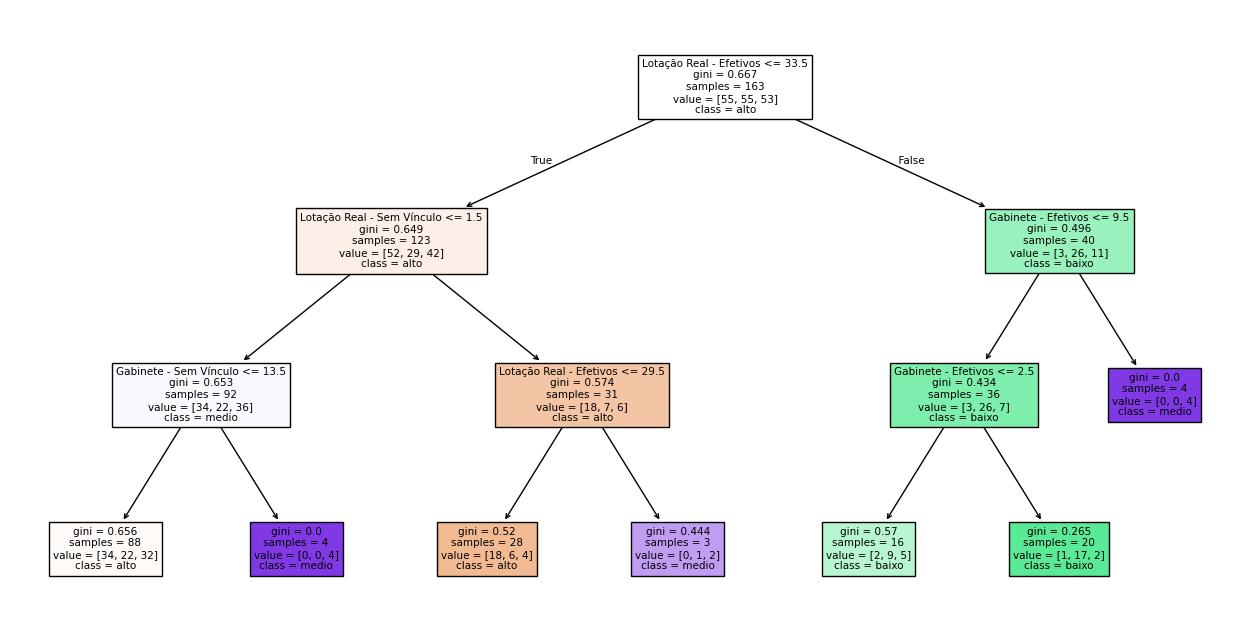

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Separar X e y
X = df_modelo[cols_servidores]
y = df_modelo["tpcpl_cat"]

# Criar e ajustar modelo
modelo = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo.fit(X, y)

# Plotar e salvar a árvore
plt.figure(figsize=(16, 8))
plot_tree(modelo, feature_names=X.columns, class_names=modelo.classes_, filled=True)
plt.savefig("/content/arvore_servidores.png", dpi=300)
plt.show()


In [ ]:
!pip install shap


In [ ]:
import shap

# Criar o explicador SHAP
explainer = shap.Explainer(modelo, X)

# Calcular os valores SHAP
shap_values = explainer(X)


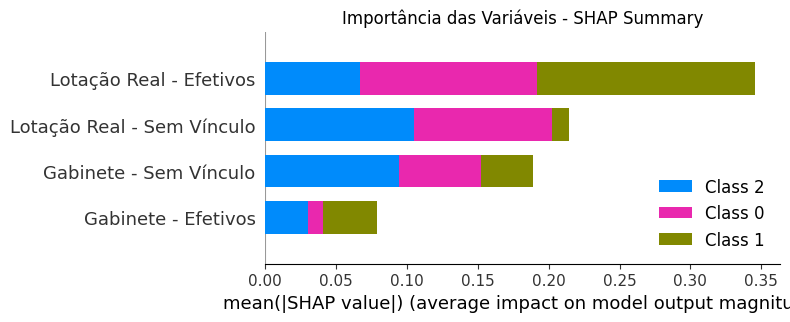

In [ ]:
import matplotlib.pyplot as plt

# Gráfico summary SHAP (dispersão)
shap.summary_plot(shap_values, X, show=False)
plt.title("Importância das Variáveis - SHAP Summary")
plt.savefig("/content/shap_summary_servidores.png", dpi=300, bbox_inches='tight')
plt.show()
